In [1]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join('..')))

In [2]:
from config.config import RAW_DATA_DIR
train_file = RAW_DATA_DIR / "train.csv"

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv(train_file, index_col="id")

DataFrame Head

In [5]:
df.head(4)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
id,,,,,,,,,,,,,,
0,58,1,4,152,239,0,0,158,1,3.6,2,2,7,Presence
1,52,1,1,125,325,0,2,171,0,0.0,1,0,3,Absence
2,56,0,2,160,188,0,2,151,0,0.0,1,0,3,Absence
3,44,0,3,134,229,0,2,150,0,1.0,2,0,3,Absence


DataFrame Columns

In [6]:
list(df.columns)

['Age',
 'Sex',
 'Chest pain type',
 'BP',
 'Cholesterol',
 'FBS over 120',
 'EKG results',
 'Max HR',
 'Exercise angina',
 'ST depression',
 'Slope of ST',
 'Number of vessels fluro',
 'Thallium',
 'Heart Disease']

Check For NaNs

In [7]:
nan_series = df.isna().sum()

nan_cols = list(nan_series[nan_series > 0])

print(f"The columns with NaNs are: {nan_cols}") if nan_cols else print("No columns with NaN")

No columns with NaN


Check For Nulls

In [8]:
null_series = df.isnull().sum()

null_cols = list(null_series[null_series != 0])

print(f"The columns with null values are {null_cols}") if null_cols else print("No columns with Null values")

No columns with Null values


Value Counts

In [27]:
feature_ignore = ['Age', 'BP', 'Cholesterol', 'Max HR']
for col in df.columns:
    if col in feature_ignore:
        continue
    print(df[col].value_counts())

Sex
1    450283
0    179717
Name: count, dtype: int64
Chest pain type
4    329179
3    197278
2     74941
1     28602
Name: count, dtype: int64
FBS over 120
0    579608
1     50392
Name: count, dtype: int64
EKG results
0    320116
2    308562
1      1322
Name: count, dtype: int64
Exercise angina
0    457553
1    172447
Name: count, dtype: int64
ST depression
0.00    314939
1.20     29269
1.00     28647
1.60     28395
1.40     27146
         ...  
4.70         4
5.10         2
2.12         1
5.90         1
0.06         1
Name: count, Length: 66, dtype: int64
Slope of ST
1    358293
2    256215
3     15492
Name: count, dtype: int64
Number of vessels fluro
0    445862
1    106978
2     54303
3     22857
Name: count, dtype: int64
Thallium
3    372286
7    246748
6     10966
Name: count, dtype: int64
Heart Disease
Absence     347546
Presence    282454
Name: count, dtype: int64


Data Types of DataFrame Columns

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 630000 entries, 0 to 629999
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Age                      630000 non-null  int64  
 1   Sex                      630000 non-null  int64  
 2   Chest pain type          630000 non-null  int64  
 3   BP                       630000 non-null  int64  
 4   Cholesterol              630000 non-null  int64  
 5   FBS over 120             630000 non-null  int64  
 6   EKG results              630000 non-null  int64  
 7   Max HR                   630000 non-null  int64  
 8   Exercise angina          630000 non-null  int64  
 9   ST depression            630000 non-null  float64
 10  Slope of ST              630000 non-null  int64  
 11  Number of vessels fluro  630000 non-null  int64  
 12  Thallium                 630000 non-null  int64  
 13  Heart Disease            630000 non-null  object 
dtypes: float6

Converting Data Types

In [34]:
categorical_columns = ['Sex', 'Chest pain type', 'FBS over 120', 'EKG results', 'Exercise angina', 'Thallium', 'Number of vessels fluro', 'Slope of ST', 'Heart Disease']
numerical_columns = []
for col in df.columns:
    if col not in categorical_columns:
        numerical_columns.append(col)

categorical_df = pd.DataFrame(df[categorical_columns])
numerical_df = pd.DataFrame(df[numerical_columns])

Float and Int Separation

In [ ]:
float_col = ['ST depression']
int_col = [col for col in numerical_columns if col not in float_col] 

['ST depression']

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

Box Plot of Numerical Features

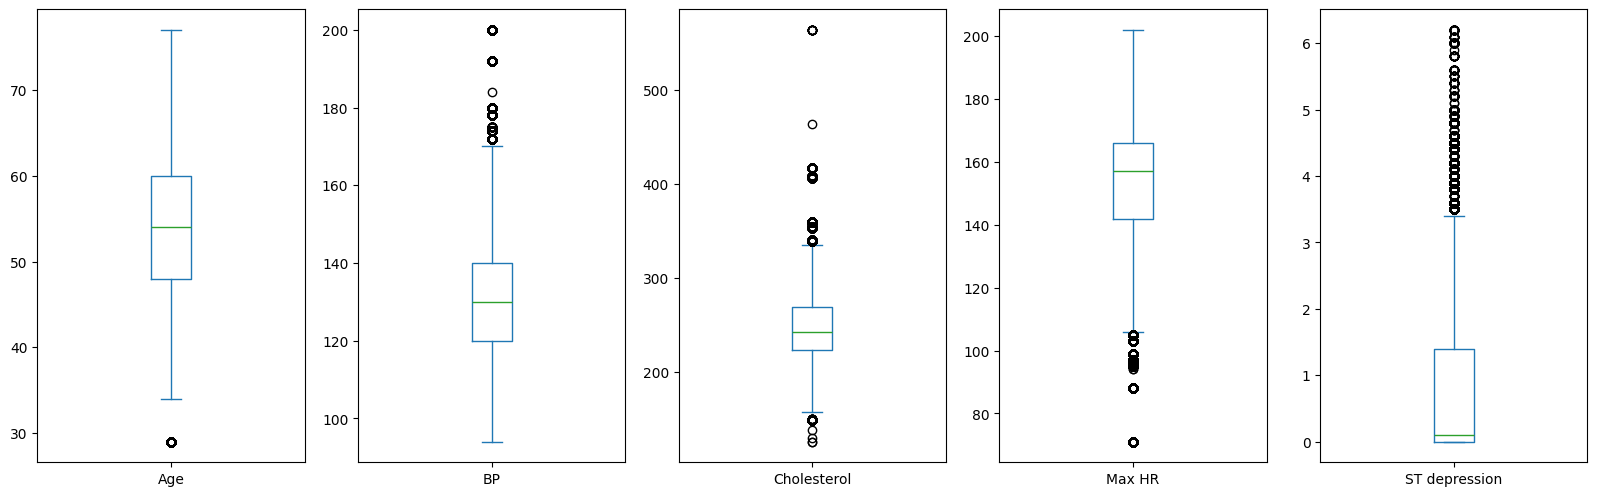

In [36]:
numerical_df.plot(kind='box', subplots=True, layout=(3,5), figsize=(20,20), sharex=False, sharey=False)
plt.show()

Hist Plot of Numerical Features

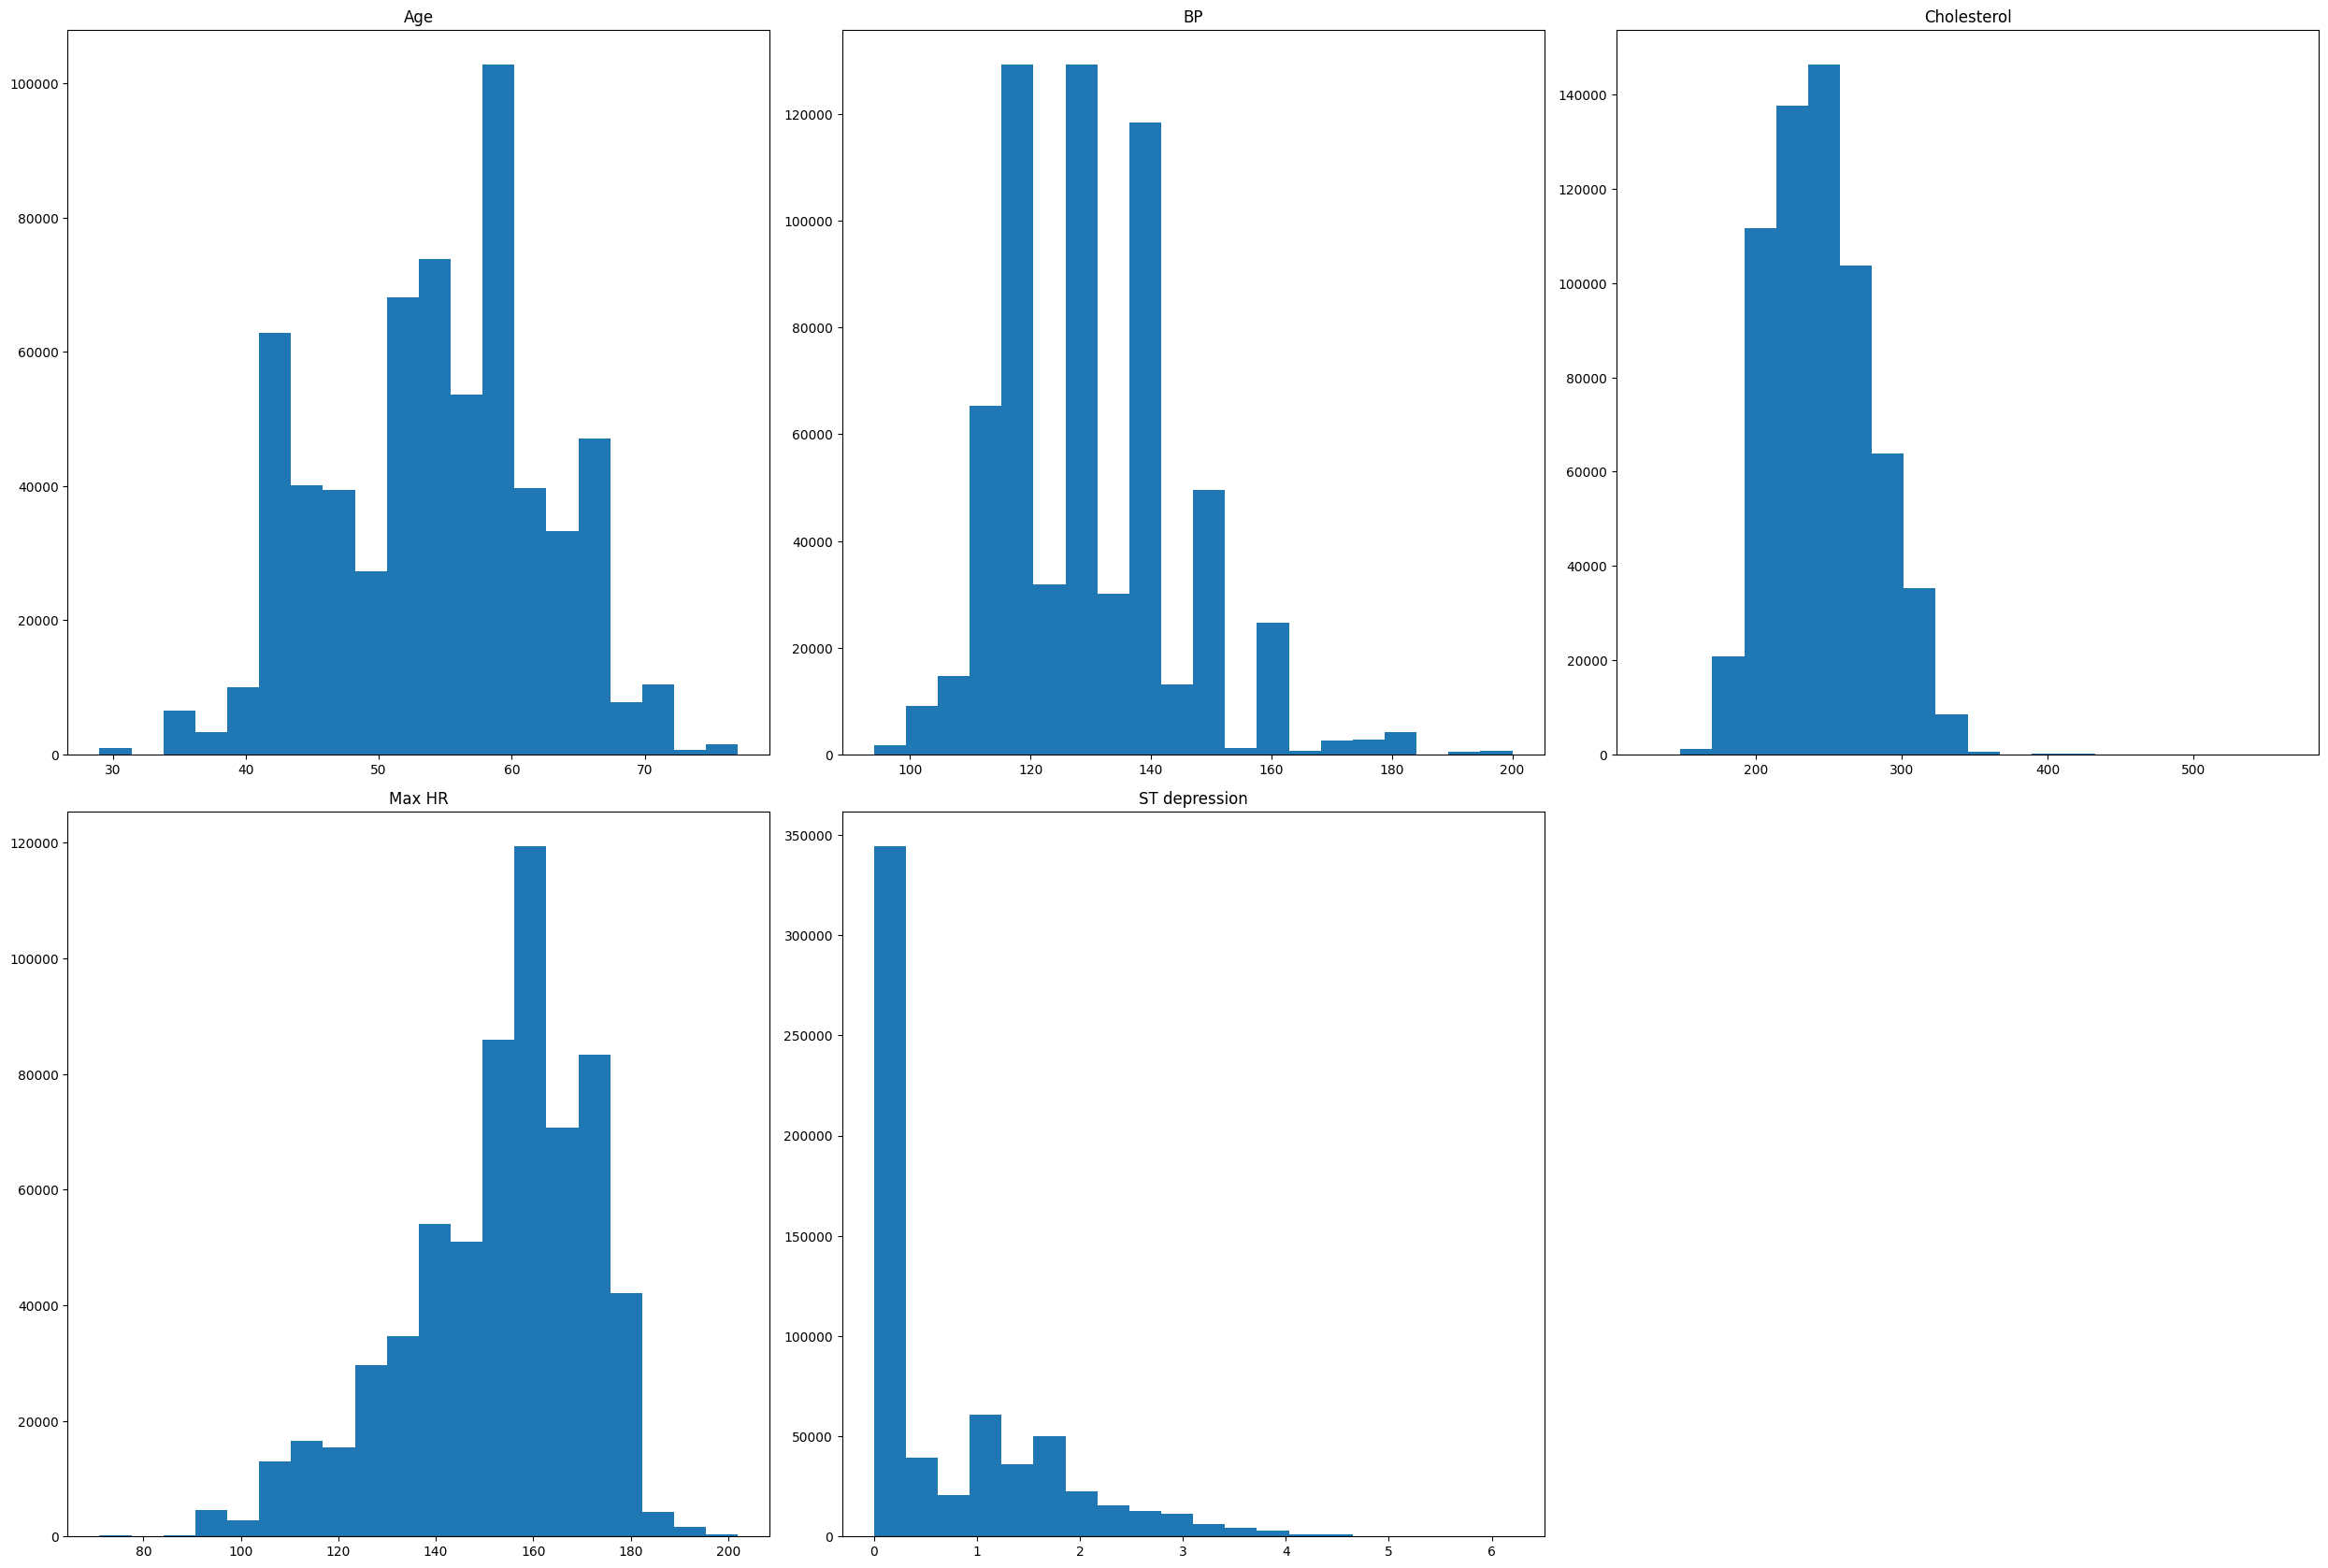

In [40]:
numerical_df.hist(bins=20, figsize=(25,25), layout=(3,3),grid=False)
plt.tight_layout()
plt.show()

In [42]:
df['Cholesterol'].describe()

count    630000.000000
mean        245.011814
std          33.681581
min         126.000000
25%         223.000000
50%         243.000000
75%         269.000000
max         564.000000
Name: Cholesterol, dtype: float64

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>],
       [<Axes: title={'center': '3'}>, <Axes: title={'center': '4'}>,
        <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

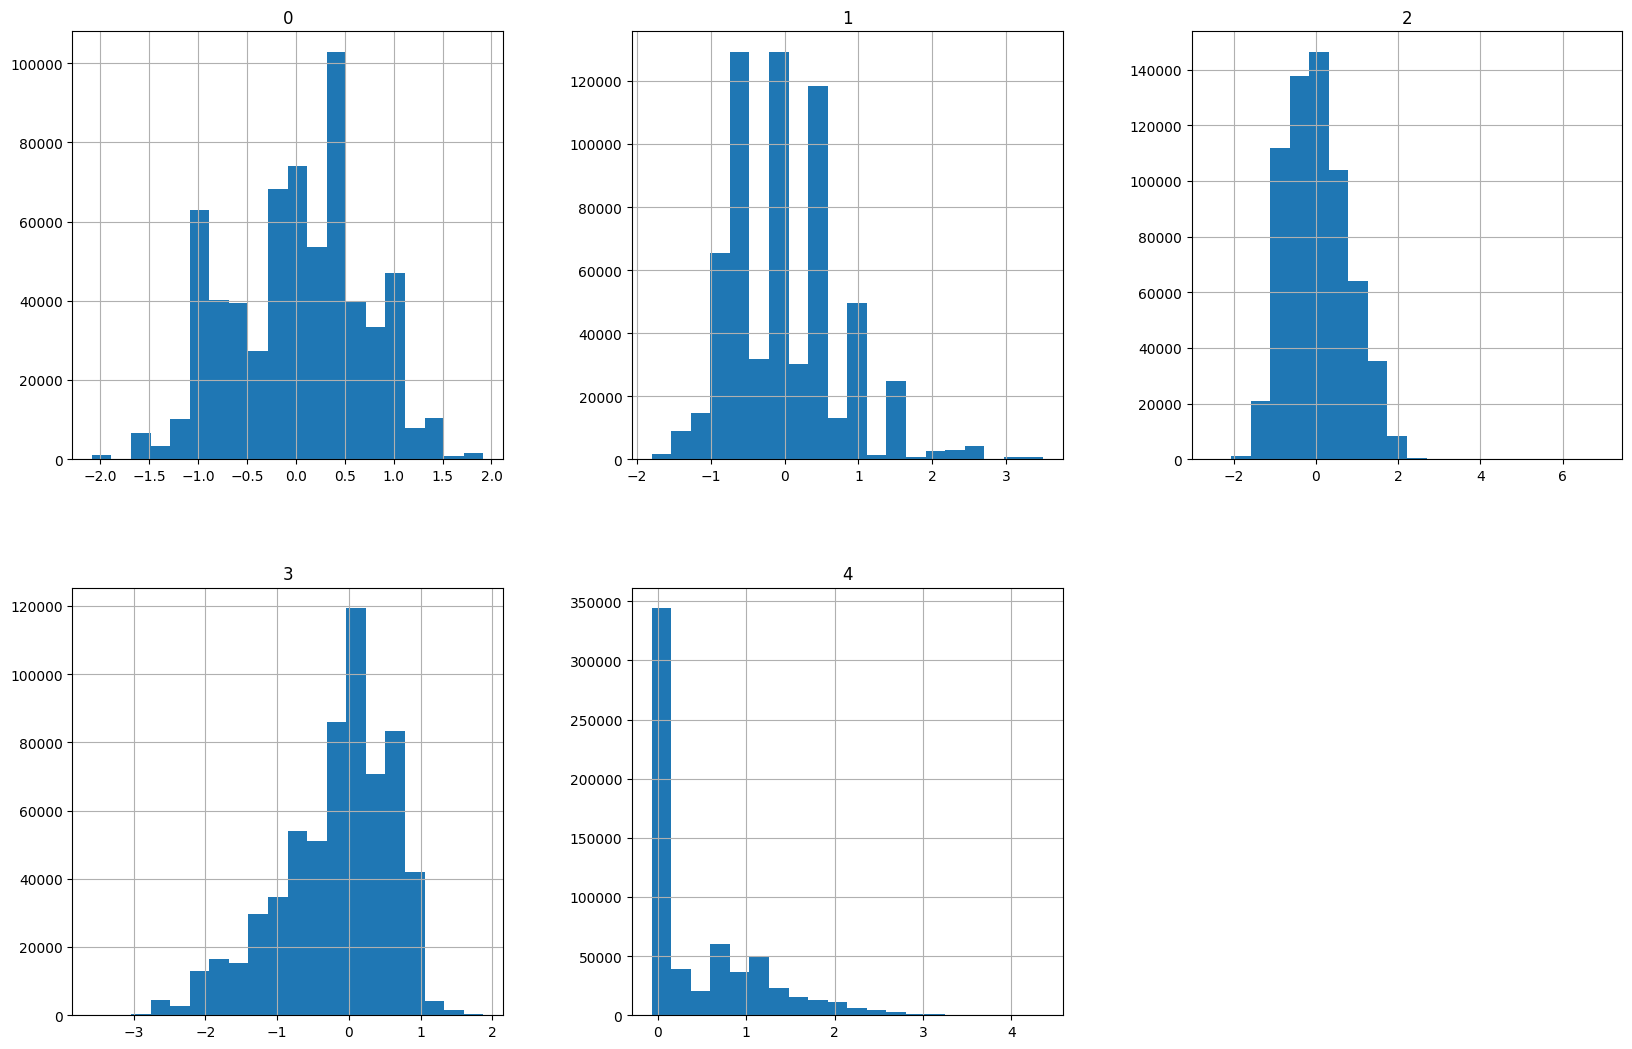

In [62]:
from sklearn.preprocessing import StandardScaler

standard_scaler = RobustScaler()
standard_scaled_data = standard_scaler.fit_transform(numerical_df)

standard_scaled_df = pd.DataFrame(standard_scaled_data)
standard_scaled_df.hist(
    figsize=(20, 20),
    layout=(3,3),
    bins=20
)
